In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [10]:
# Load the cleaned dataset
df = pd.read_csv('../data/processed/cleaned_data.csv')  # Change path if needed

In [11]:
# Supervised binning function using DecisionTreeRegressor
def supervised_binning(feature, target, max_leaf_nodes=5):
    dtree = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=42)
    feature_reshaped = feature.values.reshape(-1, 1)
    dtree.fit(feature_reshaped, target)
    thresholds = sorted(dtree.tree_.threshold[dtree.tree_.threshold > -2])
    bins = [-np.inf] + thresholds + [np.inf]
    return pd.cut(feature, bins=bins), bins

In [12]:
target = df['Total Amount']

# Apply supervised binning
df['Age_Bin_Supervised'], age_bins = supervised_binning(df['Age'], target, max_leaf_nodes=5)
df['Price_Bin_Supervised'], price_bins = supervised_binning(df['Price per Unit'], target, max_leaf_nodes=5)
df['Quantity_Bin_Supervised'], quantity_bins = supervised_binning(df['Quantity'], target, max_leaf_nodes=3)

# Print bin thresholds
print("Age bins:", age_bins)
print("Price bins:", price_bins)
print("Quantity bins:", quantity_bins)


Age bins: [-inf, np.float64(22.5), np.float64(32.5), np.float64(38.5), np.float64(42.5), inf]
Price bins: [-inf, np.float64(27.5), np.float64(40.0), np.float64(175.0), np.float64(400.0), inf]
Quantity bins: [-inf, np.float64(1.5), np.float64(2.5), inf]


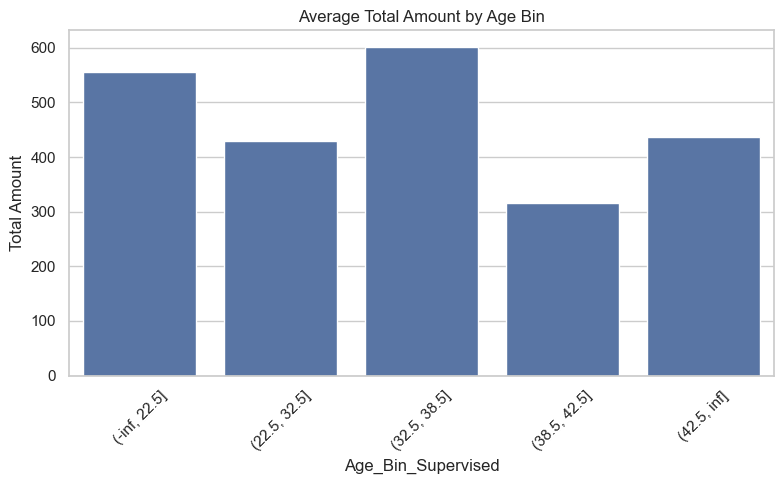

In [13]:
sns.set(style="whitegrid")

# 1. Average Total Amount per Age Bin
plt.figure(figsize=(8, 5))
sns.barplot(x='Age_Bin_Supervised', y='Total Amount', data=df, estimator=np.mean, errorbar=None)
plt.title('Average Total Amount by Age Bin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

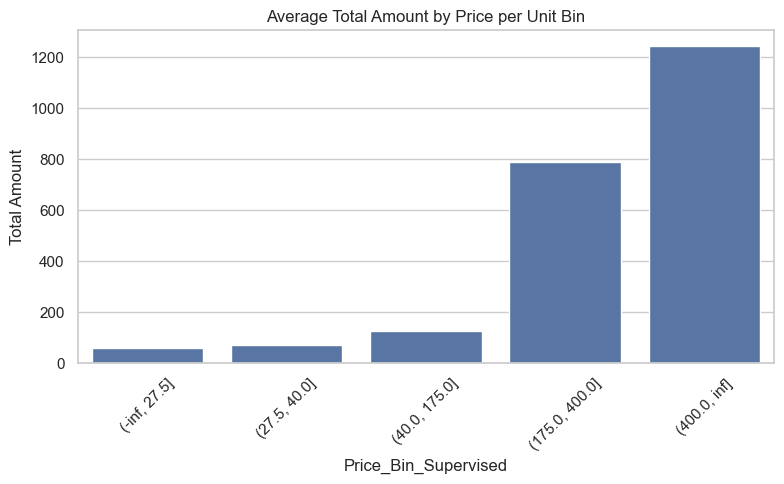

In [14]:
# 2. Average Total Amount per Price Bin
plt.figure(figsize=(8, 5))
sns.barplot(x='Price_Bin_Supervised', y='Total Amount', data=df, estimator=np.mean, errorbar=None)
plt.title('Average Total Amount by Price per Unit Bin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

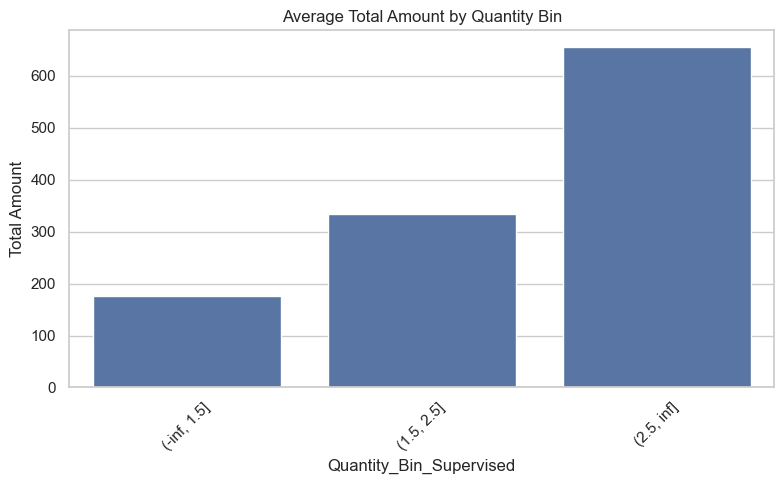

In [15]:
# 3. Average Total Amount per Quantity Bin
plt.figure(figsize=(8, 5))
sns.barplot(x='Quantity_Bin_Supervised', y='Total Amount', data=df, estimator=np.mean, errorbar=None)
plt.title('Average Total Amount by Quantity Bin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Optional: Save final dataset
df.to_csv('../data/processed/binned_data.csv', index=False)